# Assignment 1

**Deadline**:  Sunday 20 November, 23.59.

Your notebook should not give errors when executed with `Run All`. Please submit your answers via [Canvas](https://canvas.uva.nl/courses/34329/assignments/351266).

| |Name |Student number|Email|
|:-|:----|:-------------|:----|
|1.|Qingpingyi Shi|14334569|ping.yi.shi@student.uva.nl|
|2.| Sherry Huang |14380463        |   sherry.huang2@student.uva.nl  |

****Hand in the following****:
* Your notebook. N.B. **click on `Kernel`, then `Restart & Run All`** before submitting, see notes.
* A (printed) pdf version of your notebook.

****NOTES****:
* The assignment is a partial stand-in for a final examination, so the usual rules regarding plagiarism and fraud apply, with all attendant consequences. Code found on the internet or elsewhere is not acceptable as a solution.
* Before submitting your work, **click on `Kernel`, then `Restart & Run All`** and verify that your notebook produces the desired results and does not error.
* Make sure that any function you write has a docstring, and comments where appropriate.
* Some questions require you to write code to obtain a numerical result (e.g., an option price). In that case, don't just give the function, but also the result of calling it with the given parameter values (i.e., the numerial value that it returns). If your function uses random numbers, then set the seed to 0 before calling it. This makes it much easier to grade the assignments (at least as long as the answer is correct).
* How to convert your notebook to pdf: The easiest way is probably to use your browser's print functionality: e.g. in Chrome, press the three dots to go to Options, select 'Print...', and then select 'save as pdf' as Destination. I usually set it to 70% zoom such that the output fits the printed pdf pages.

**Declaration of Originality**:

We whose names are given under 1. and 2. above declare that
1. These solutions are solely our own work.
2. We have not made these solutions available to any other student.

## Question 1: Testing the CAPM
The CAPM implies that
\begin{equation*}
E(R_{i}-R_{f})=\beta _{i}E(R_{m}-R_{f}),\qquad \beta _{i}=\frac{\mathrm{cov}%
(R_{i},R_{m})}{\mathrm{var}(R_{m})},
\end{equation*}

where $R_i$ is the return on a stock, and $R_m$ is the market return. Suppose we have time series on $n$ different stock or portfolio returns $\{R_{it},i=1,\ldots ,n\}_{t=1}^{T}$ and on a "market return" (value weighted index) $\{R_{mt}\}_{t=1}^{T}$.  We also have observations on a risk-free interest rate $\{R_{ft}\}_{t=1}^{T}$ and construct with these the excess returns $r_{it}=R_{it}-R_{ft}$ and $r_{mt}=R_{mt}-R_{ft}$. Now $\beta_i$ can be estimated from the time-series regression \begin{equation*}
r_{it}=\alpha _{i}+\beta _{i}r_{mt}+\varepsilon _{it},\qquad t=1,\ldots ,T.
\end{equation*}

One way to test the CAPM is as follows: denote by $\bar{r}_{i}$
and $\hat{\beta}_{i}$ the average excess return and estimated $\beta$ of stock $i$. If the model $E(r_{i})=\beta_{i}E(r_{m})$ is valid, then $(\hat{\beta}_{i},\bar{r}_{i})$ should lie on a line with zero intercept and slope $\lambda =E(r_{mt})$. This line is called the *security market line*, and $\lambda$ is known as the *market risk premium*.

We can estimate $\lambda $ by OLS in the cross-section regression
\begin{equation*}
\bar{r}_{i}=\lambda \hat{\beta}_{i}+\alpha _{i},\qquad i=1,\ldots ,n.
\end{equation*}
Note that $\hat{\beta_i}$ is the regressor, $\lambda$ the coefficient, and $\alpha_i$ the error term.

The assignment is to estimate the CAPM betas of the 30 constituent stocks of the Dow (using the return on the Dow as the market return, and the 3 month T-bill rate as the risk-free rate), then estimate the above cross-section regression, and finally make a plot of the security market line superimposed on a scatter plot of $(\hat{\beta}_{i},\bar{r}_{i})$.

**1.1** Import the relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import statsmodels.formula.api as smf

**1.2** Obtain, from the FRED database, the daily adjusted closing prices of the Dow Jones Industrial Average (DJIA) from *31/12/2012 to 30/09/2022*. Convert them into percentage log returns $r_t=100 \times \log(P_t/P_{t-1})$ and store them in a DataFrame `df_1`, which has the date as index and 'DJIA' as column name:

In [2]:
from datetime import datetime
start = datetime(2012, 12, 31)
end = datetime(2022, 9, 30)
p = web.DataReader('DJIA', 'fred', start, end)
df_1 = pd.DataFrame()
df_1['DJIA'] = 100*(np.log(p['DJIA']) - np.log(p['DJIA']).shift(1)); df_1

,DJIA
DATE,
2012-12-31,NaN
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,-0.158111
2013-01-04,0.326915
...,...
2022-09-26,-1.120124
2022-09-27,-0.430922
2022-09-28,1.865956


**1.3** Obtain, also from the FRED database, daily data on the 3-month T-bill rate (DTB3) for the same period and divide them by 365 (because the reported rate is annualized):

In [3]:
t = web.DataReader('DTB3', 'fred', start, end)
rf = np.divide(t, 365); rf

,DTB3
DATE,
2012-12-31,0.000137
2013-01-01,NaN
2013-01-02,0.000219
2013-01-03,0.000219
2013-01-04,0.000192
...,...
2022-09-26,0.009041
2022-09-27,0.008932
2022-09-28,0.009014


**1.4** The csv file `tickerdata.csv` which has been provided with this assignment contains the adjusted closing prices for the 30 constituent stocks of the Dow Jones.

Import the dataset into a second DataFrame `df_2`, convert the `Date`-column to datetime, and make the `Date`-column the new index:

In [4]:
url = 'https://raw.githubusercontent.com/ParsleySh/assignment1/main/tickerdata.csv'
df_2 = pd.read_csv(url); df_2

# Ticker data is now stored in a Pandas Dataframe

,Date,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
0,2012-12-31,16.372103,67.002235,49.984219,63.150887,68.371063,42.025002,14.491234,72.065132,45.263737,...,28.633364,22.086391,23.162476,50.996231,57.248943,46.653526,35.419888,27.464949,28.329332,54.851322
1,2013-01-02,16.890800,69.295235,51.266991,64.583847,71.339066,42.792500,15.000084,73.564545,46.454651,...,28.913128,22.838863,23.270205,52.122986,58.077946,46.911545,36.307838,28.099678,29.133066,55.663265
2,2013-01-03,16.677595,68.859940,51.485146,64.919060,72.025764,42.177502,15.081205,73.251312,46.554642,...,29.605520,22.532915,23.508112,51.792461,58.524315,44.718204,36.335884,27.966396,28.926388,55.309536
3,2013-01-04,16.213049,69.163078,52.017456,65.103394,72.422493,42.402500,15.103327,73.637863,47.445560,...,29.353733,22.111197,23.737049,51.897629,59.034481,44.804226,36.632641,28.118727,28.459463,55.518578
4,2013-01-07,16.117678,68.813301,52.235619,63.796139,72.643761,42.244999,14.963211,73.138046,46.336460,...,29.458654,22.069859,23.772951,51.544586,58.237358,44.804226,36.894352,28.366282,29.110100,54.987984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,2022-09-26,150.770004,226.869995,137.449997,127.339996,162.619995,146.320007,40.206535,140.960007,98.120003,...,86.180000,237.449997,96.059998,135.710007,150.600006,508.359985,180.589996,38.284790,32.689999,131.309998
2452,2022-09-27,151.759995,225.990005,137.490005,127.510002,162.440002,148.889999,40.147087,141.020004,95.849998,...,85.839996,236.410004,96.290001,131.979996,151.240005,508.369995,177.869995,38.245453,32.430000,130.949997
2453,2022-09-28,149.839996,230.979996,140.559998,133.440002,167.759995,150.169998,40.959541,145.779999,99.400002,...,86.779999,241.070007,98.699997,131.979996,152.919998,513.940002,179.179993,38.737164,33.200001,133.110001
2454,2022-09-29,142.479996,228.410004,137.789993,125.330002,165.899994,146.809998,40.196625,144.770004,97.449997,...,86.639999,237.500000,95.330002,128.699997,154.679993,508.829987,180.059998,37.999596,31.549999,132.250000


In [5]:
df_2['Date'] =  pd.to_datetime(df_2['Date'])
#Convert date in to datetime 

In [6]:
df_2 = df_2.set_index('Date')
#Date column the new index

**1.5** Using a `for` loop (over the columns), convert all the given adjusted closing prices into percentage log returns $r_t=100\log(P_t/P_{t-1})$:

In [7]:
for key in df_2.keys():
  df_2[key] = 100 * np.log(df_2[key] / df_2[key].shift(1))
#Convert closing prices to log returns
df_2

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DD,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,3.119029,3.365016,2.533976,2.243745,4.249440,1.809813,3.451189,2.059286,2.597039,2.202591,...,0.972314,3.350197,0.464023,2.185431,1.437681,0.551529,2.476020,2.284752,2.797608,1.469413
2013-01-03,-1.270291,-0.630156,0.424624,0.517693,0.957981,-1.447590,0.539349,-0.426702,0.215013,0.302110,...,2.366509,-1.348648,1.017178,-0.636143,0.765631,-4.788312,0.077214,-0.475446,-0.711957,-0.637508
2013-01-04,-2.824980,0.439259,1.028603,0.283542,0.549303,0.532038,0.146575,0.526318,1.895624,1.437584,...,-0.854111,-1.889302,0.969153,0.202850,0.867939,0.192179,0.813387,0.543213,-1.627352,0.377236
2013-01-07,-0.589975,-0.507011,0.418526,-2.028401,0.305058,-0.372135,-0.932044,-0.681064,-2.365383,-0.119004,...,0.356801,-0.187130,0.151135,-0.682592,-1.359466,0.000000,0.711881,0.876538,2.260446,-0.960301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,0.225771,-0.044071,-2.023761,-3.031940,-0.991265,-0.470452,-0.196942,-2.667010,-1.396640,-1.369210,...,-0.693803,-0.197741,-0.994414,0.095842,-3.188972,-1.027436,-1.848913,-1.504175,-0.427361,0.956506
2022-09-27,0.654476,-0.388637,0.029103,0.133416,-0.110744,1.741172,-0.147967,0.042554,-2.340679,0.079890,...,-0.395308,-0.438946,0.239151,-2.786994,0.424066,0.001969,-1.517633,-0.102802,-0.798525,-0.274537
2022-09-28,-1.273226,2.184033,2.208320,4.545715,3.222564,0.856020,2.003490,3.319687,3.636768,2.289423,...,1.089111,1.951978,2.472043,0.000000,1.104688,1.089701,0.733793,1.277476,2.346597,1.636031


**1.6** Concatenate DataFrames `df_1` and `df_2` along the common axis to a final DataFrame `df`:


Notes (also hold for next question):
* Need to specify the axis
* `dtype` of the indices should be the same

In [8]:
df = pd.concat([df_1, df_2], axis=1, join="inner"); df
#axis = 1, same columns

,DJIA,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,3.119029,3.365016,2.533976,2.243745,4.249440,1.809813,3.451189,2.059286,2.597039,...,0.972314,3.350197,0.464023,2.185431,1.437681,0.551529,2.476020,2.284752,2.797608,1.469413
2013-01-03,-0.158111,-1.270291,-0.630156,0.424624,0.517693,0.957981,-1.447590,0.539349,-0.426702,0.215013,...,2.366509,-1.348648,1.017178,-0.636143,0.765631,-4.788312,0.077214,-0.475446,-0.711957,-0.637508
2013-01-04,0.326915,-2.824980,0.439259,1.028603,0.283542,0.549303,0.532038,0.146575,0.526318,1.895624,...,-0.854111,-1.889302,0.969153,0.202850,0.867939,0.192179,0.813387,0.543213,-1.627352,0.377236
2013-01-07,-0.379724,-0.589975,-0.507011,0.418526,-2.028401,0.305058,-0.372135,-0.932044,-0.681064,-2.365383,...,0.356801,-0.187130,0.151135,-0.682592,-1.359466,0.000000,0.711881,0.876538,2.260446,-0.960301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-1.120124,0.225771,-0.044071,-2.023761,-3.031940,-0.991265,-0.470452,-0.196942,-2.667010,-1.396640,...,-0.693803,-0.197741,-0.994414,0.095842,-3.188972,-1.027436,-1.848913,-1.504175,-0.427361,0.956506
2022-09-27,-0.430922,0.654476,-0.388637,0.029103,0.133416,-0.110744,1.741172,-0.147967,0.042554,-2.340679,...,-0.395308,-0.438946,0.239151,-2.786994,0.424066,0.001969,-1.517633,-0.102802,-0.798525,-0.274537
2022-09-28,1.865956,-1.273226,2.184033,2.208320,4.545715,3.222564,0.856020,2.003490,3.319687,3.636768,...,1.089111,1.951978,2.472043,0.000000,1.104688,1.089701,0.733793,1.277476,2.346597,1.636031
2022-09-29,-1.555404,-5.036642,-1.118883,-1.990369,-6.270168,-1.114919,-2.262876,-1.880175,-0.695232,-1.981273,...,-0.161457,-1.491975,-3.474034,-2.516627,1.144352,-0.999259,0.489927,-1.922392,-5.097633,-0.648179


**1.7** Convert the raw returns in `df` to excess returns by subtracting the `pandas` series `rf` from all columns:

In [9]:
for column in df.columns:
  df[column] = df[column] - rf['DTB3']              

df

,DJIA,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,3.118810,3.364797,2.533757,2.243525,4.249221,1.809594,3.450970,2.059066,2.596820,...,0.972095,3.349978,0.463804,2.185212,1.437462,0.551310,2.475800,2.284533,2.797389,1.469193
2013-01-03,-0.158330,-1.270510,-0.630375,0.424405,0.517473,0.957762,-1.447809,0.539130,-0.426921,0.214793,...,2.366290,-1.348868,1.016959,-0.636362,0.765412,-4.788532,0.076995,-0.475665,-0.712176,-0.637728
2013-01-04,0.326723,-2.825172,0.439067,1.028411,0.283350,0.549112,0.531847,0.146383,0.526126,1.895433,...,-0.854303,-1.889494,0.968961,0.202658,0.867747,0.191987,0.813196,0.543021,-1.627544,0.377044
2013-01-07,-0.379916,-0.590166,-0.507203,0.418334,-2.028593,0.304866,-0.372327,-0.932236,-0.681256,-2.365575,...,0.356609,-0.187322,0.150943,-0.682783,-1.359658,-0.000192,0.711689,0.876347,2.260254,-0.960493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-1.129166,0.216730,-0.053112,-2.032802,-3.040981,-1.000306,-0.479493,-0.205984,-2.676051,-1.405681,...,-0.702844,-0.206782,-1.003455,0.086801,-3.198013,-1.036478,-1.857954,-1.513216,-0.436402,0.947465
2022-09-27,-0.439854,0.645545,-0.397568,0.020172,0.124485,-0.119676,1.732240,-0.156898,0.033623,-2.349611,...,-0.404240,-0.447878,0.230219,-2.795926,0.415134,-0.006962,-1.526564,-0.111733,-0.807456,-0.283469
2022-09-28,1.856943,-1.282239,2.175020,2.199306,4.536701,3.213550,0.847006,1.994476,3.310674,3.627754,...,1.080097,1.942964,2.463030,-0.009014,1.095674,1.080688,0.724779,1.268463,2.337583,1.627017
2022-09-29,-1.564336,-5.045574,-1.127815,-1.999300,-6.279100,-1.123851,-2.271807,-1.889107,-0.704164,-1.990205,...,-0.170389,-1.500907,-3.482965,-2.525559,1.135421,-1.008190,0.480995,-1.931323,-5.106565,-0.657110


**1.8** Drop all rows from `df` that contain at least one NaN:

In [10]:
df = df.dropna(); df

,DJIA,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2013-01-03,-0.158330,-1.270510,-0.630375,0.424405,0.517473,0.957762,-1.447809,0.539130,-0.426921,0.214793,...,2.366290,-1.348868,1.016959,-0.636362,0.765412,-4.788532,0.076995,-0.475665,-0.712176,-0.637728
2013-01-04,0.326723,-2.825172,0.439067,1.028411,0.283350,0.549112,0.531847,0.146383,0.526126,1.895433,...,-0.854303,-1.889494,0.968961,0.202658,0.867747,0.191987,0.813196,0.543021,-1.627544,0.377044
2013-01-07,-0.379916,-0.590166,-0.507203,0.418334,-2.028593,0.304866,-0.372327,-0.932236,-0.681256,-2.365575,...,0.356609,-0.187322,0.150943,-0.682783,-1.359658,-0.000192,0.711689,0.876347,2.260254,-0.960493
2013-01-08,-0.415269,0.268609,-0.430330,0.566189,-2.662439,-1.279167,0.583970,0.098325,-0.447639,-0.413044,...,0.142143,-0.526136,-1.063214,-0.160629,0.177588,-1.333648,0.926512,-2.463807,0.367234,0.277180
2013-01-09,0.461374,-1.575385,0.588018,0.099459,3.486224,0.466811,1.088202,-0.049414,0.255754,0.039227,...,0.967177,0.563220,0.095232,0.538446,1.019354,1.869368,1.513137,-0.232457,0.730740,-0.029328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,-1.129166,0.216730,-0.053112,-2.032802,-3.040981,-1.000306,-0.479493,-0.205984,-2.676051,-1.405681,...,-0.702844,-0.206782,-1.003455,0.086801,-3.198013,-1.036478,-1.857954,-1.513216,-0.436402,0.947465
2022-09-27,-0.439854,0.645545,-0.397568,0.020172,0.124485,-0.119676,1.732240,-0.156898,0.033623,-2.349611,...,-0.404240,-0.447878,0.230219,-2.795926,0.415134,-0.006962,-1.526564,-0.111733,-0.807456,-0.283469
2022-09-28,1.856943,-1.282239,2.175020,2.199306,4.536701,3.213550,0.847006,1.994476,3.310674,3.627754,...,1.080097,1.942964,2.463030,-0.009014,1.095674,1.080688,0.724779,1.268463,2.337583,1.627017
2022-09-29,-1.564336,-5.045574,-1.127815,-1.999300,-6.279100,-1.123851,-2.271807,-1.889107,-0.704164,-1.990205,...,-0.170389,-1.500907,-3.482965,-2.525559,1.135421,-1.008190,0.480995,-1.931323,-5.106565,-0.657110


**1.9** Use a `for` loop to estimate a CAPM time series regression for each stock, and store the estimated slope coefficient in a list. 

*Hint*: use string interpolation to construct the regression equation and use the list `tickers` below, containing the ticker symbols of all 30 constituent stocks of the DJIA.

In [11]:
tickers = ["AAPL", "AMGN", "AXP", "BA", "CAT", "CRM", "CSCO", "CVX", "DIS", "DD",
            "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KO", "MCD", "MMM", 
            "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "V", "VZ", "WBA","WMT"]

In [12]:
from statsmodels.formula.api import ols
marketreturn = df['DJIA']

betat = []
for ticker in tickers:
  model = ols(formula = f'{ticker} ~ marketreturn', data = df).fit()
  betat.append(model.params[1])

betat = pd.DataFrame(betat, index = tickers, columns = ['beta']); betat

,beta
AAPL,1.048850
AMGN,0.804790
AXP,1.295894
BA,1.577632
CAT,1.131113
CRM,1.111738
CSCO,0.992756
CVX,1.146836
DIS,1.026501
DD,1.195358


**1.10** Create a new dataframe that has `tickers` as index, and two columns: `beta`, containing the 30 estimated betas, and `meanret`, containing the mean excess returns of the 30 stocks:

In [13]:
df = df.drop(['DJIA'], axis = 1) #Drop DJIA index
meanret = df.mean() #Calculate the mean excess returns of the 30 stocks
dfn = pd.concat([betat, pd.DataFrame(meanret, columns = ['mean ret'])], axis=1, join="inner"); dfn

,beta,mean ret
AAPL,1.048850,0.079684
AMGN,0.804790,0.050180
AXP,1.295894,0.044103
BA,1.577632,0.030306
CAT,1.131113,0.045244
CRM,1.111738,0.043258
CSCO,0.992756,0.040755
CVX,1.146836,0.031810
DIS,1.026501,0.031119
DD,1.195358,0.028761


**1.11** Estimate the security market line by a cross-sectional regression (without intercept), and print a summary of the result:

In [14]:
model = ols('meanret ~ betat - 1', data=dfn)
result = model.fit(cov_type = 'HAC', cov_kwds = {'maxlags':5})
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                meanret   R-squared (uncentered):                   0.767
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              75.08
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                    1.53e-09
Time:                        13:41:41   Log-Likelihood:                          70.266
No. Observations:                  30   AIC:                                     -138.5
Df Residuals:                      29   BIC:                                     -137.1
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

**1.12** Make a scatter plot of $(\hat{\beta}_{i},\bar{r}_{i})$ and overlay it with a red regression line (the security market line). Add a title and legend, and label the axes:

In [15]:
lam = result.params[0]; lam

0.04207107200261073

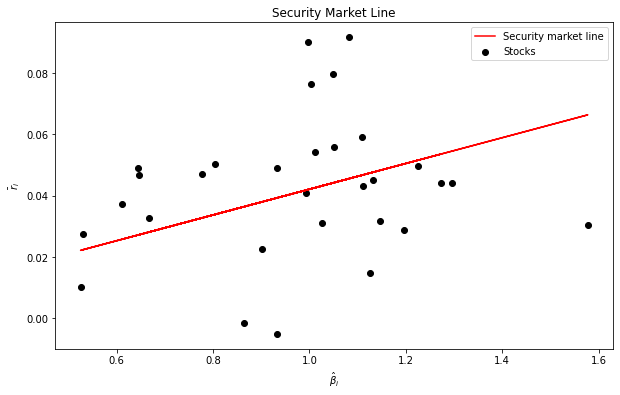

In [16]:
from matplotlib import pyplot as plt
# Figure
plt.figure(figsize=(10,6))
plt.scatter(betat, meanret, color='k')
plt.xlabel(r'$\hat{\beta}_{i}$')
plt.ylabel(r'$\bar{r}_{i}$')
plt.plot(betat, lam*betat, color = 'red')
plt.legend(['Security market line','Stocks'])
plt.title('Security Market Line');

## Question 2: Value at Risk
In this question we construct a VaR estimate for one stock, for the Bank of America (`BA`). We split the sample into two periods to evaluate the VaR out-of-sample. You can re-use the data from the previous question.

**2.1** First, create a pandas Series `rba` from the `BA` (Bank of America) column of `df`. Then, split the sample of `r_hirisk` into two parts: one sample from 2012-2020, and one sample from 2021-2022.

In [17]:
rba=pd.Series(df['BA'])
s1=df.loc['2012':'2020']
s2=df.loc['2021':'2022']
r_s1=s1['BA']
r_s2=s2['BA']

**2.2** Use the first sample (2012-2020) to compute the 1% VaR assuming a Student's $t$ distribution.

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df, m, h = stats.t.fit(r_s1) #we are fitting a location-scale student's t distribution to the first sample  
VaR_s1 = -stats.t.ppf(0.01, df, loc=m, scale=h) 
VaR_s1, m, h, df

(6.298096942665408,
 0.10128099930593162,
 1.1102047850767331,
 2.3318874940098224)

**2.3** Test the fit of the Student's *t* distribution using a QQ plot, and give a conclusion in words.

Text(0.5, 1.0, "QQ Plot vs Student's t distribution")

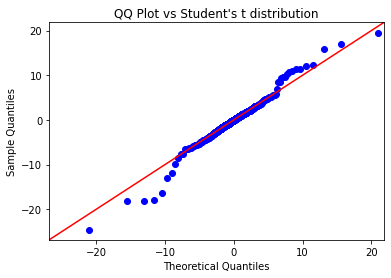

In [19]:
sm.qqplot(r_s1, dist=stats.t, fit=True, line='45')
plt.title("QQ Plot vs Student's t distribution")
#Between -8 and +8 quantiles the points almost lie on the 45 degree line, indicating a good fit of the student's t distribution.
#However, to the left of -8 quantile, there are a few points deviating from (below) the 45 degree line, whilist to the right of+8 quantile, there are also some pointes above the 45 degree line, implying heavy tails. 
#Therefore, the student's t distribution underestimates the value at risk(VaR) of the first sample.

**2.4** Based on the first sample (2012-2020), make a plot consisting of two subplots, the left of which shows $-R_t$ and $VaR^{0.01}$, and the right panel showing a histogram of $R_t$ overlaid with the fitted Student's *t* distribution. Make sure to add title, legend, and axis labels.

*Hint*: The Value at Risk $VaR^{0.01}$ is constant over time, so the plot of the VaR will be a horizontal line.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

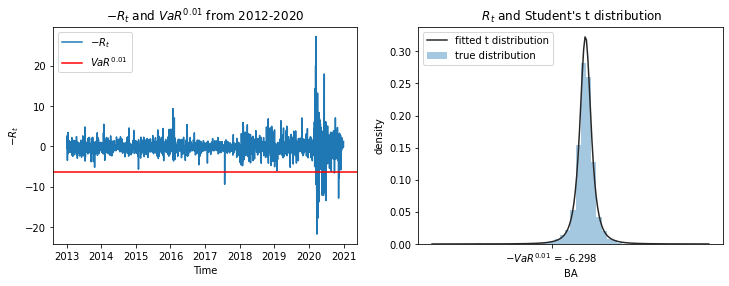

In [20]:
minus_rt=-1*r_s1
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(minus_rt,label="$-R_{t}$")
plt.axhline(y=-VaR_s1,c="r", label="$VaR^{0.01}$") #adding the horizontal VaR line, color is red
plt.legend()
plt.xlabel("Time")
plt.ylabel("$-R_{t}$")
plt.title('$-R_{t}$ and $VaR^{0.01}$ from 2012-2020')
plt.subplot(122)
ax=sns.distplot(r_s1, kde=False, fit=stats.t)  #Histogram of returns overlaid with the fitted student's t distribution 
ax.set_xticks([-VaR_s1])
ax.set_xticklabels(['$-VaR^{0.01}$ = -%4.3f' %VaR_s1 ])
plt.title(" $R_{t}$ and Student's t distribution")
plt.legend(["fitted t distribution","true distribution"])
plt.ylabel("density")



**2.5** Use the second sample (2021-2022) to evaluate the VaR by counting the number of exceedances in the period 2021-2022. Give a conclusion in words.

In [21]:
exceedances = len([i for i in r_s2 if i < -VaR_s1])
print(exceedances)
#There are 5 exceedances in the period 2021-2022, so the method lies in the yellow zone, which will incur an extra capital charge.

5
